# Predicting Diamond Prices
## Phase 2: Statistical Modelling

#### Group Name: Group 48

#### Name(s) & ID(s) of Group Members:
Ricky Truong s3783560 <br>
Nicholas Waterson s3920382

#### 

## Table of Contents
- [Introduction](#intro)
 - [Phase 1 Summary](#summary)
 - [Report Overview](#overview)
 - [Overview of Methodology](#method)
- [Statistical Modelling](#sm)
 - [Model Overview](#mo)
 - [Model Fitting](#fitting)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)
 - [Project Summary](#ps)
 - [Summary of Findings](#sf)
 - [Conclusions](#con)

## Introduction <a id='intro'></a>

### Phase 1 Summary<a id ='summary'></a>

Phase one summary consisted of obtaining a suitable dataset for our project, that had to fulfill certain criteria. The dataset had to contain a minimum of 200 rows and 8 descriptive features after dropping the unnecessary features. Due to the nature of the project, the data set had to be a multiple linear regression, where the target variable will be numerically. Hence any time series dataset are not eligible. We chose a diamond dataset where the price of a single diamond was the target feature.

The main purpose of Phase 1 was pre-processing and data cleaning the data set, so that it was ready for phase 2. This was done through a number of methods, such as dealing with missing or inccorect values by droppping them completely, relabeling descriptive features so that they accurately describe the feature and removing potential outliers so that our results would be more accurate.

The secondary objective of Phase 1 was to present the pre-processed and clean data in a multitude of graphs. In our Phase 1 report, we used histograms, boxplots, scatterplots and barplots to present on variable, two bariable and three variable plots. And from these graphs we could deduce different conclusions for certain descriptive features in relation to the price of the diamond. e.g the mean, median and mode of the price based on the shape of the diamond.

The clean and preprocessed diamond dataset will be saved as a new and separate csv file which will be used in this report.

### Report Overview<a id ='overview'></a>

In this report we will continue to use our clean diamond dataset to perform multiple linear regression, where the prices of diamonds will be predicted through various descriptive features. The report will go over the methodology that is the statistical modeling method we will be using in order to achieve multiple linear regression. It will also go over the python code needed in order to achieve this as well as assumptions checks, model selections and residual plots of the regression result. Accompanying this will be our analysis of the results and the strength and weaknesses of our method which will be indicated by the regression results and its limitation. Concluding the report will be our findings and how we can relate it to our overall goal of this project.

### Overview of Methodology<a id ='method'></a>

The first step in multiple linear regression would be obtaining a clean data set that has under gone some sort of pre-processing. This was done in Phase 1, in which will save the cleaned data frame as a csv and will be using this csv instead of the raw csv. After importing this csv into the project will be being the multiple linear regression by first one hot encoding all the categorical features, that is features that are labeled as objects in pandas. This is done by using the get_dummies() function.From this we will obtain a statistical model formula which be then be used to fit an ordinary leasts squares model to the encoded data. After this we will plot the regressions residual.

The next step would be performing backward feature selection using p values, where if a p-value of a feature is higher than 0.05, that feature will be deemed as not statistical important in predicting the diamond price and hence will be removed. As the name suggest the backward feature selections starts with the highest p value above 0.05 if found, and will continue to remove features until all feature p-values are under 0.05. Through each removal, the p-value of the remaining features are recalculated.

## Statistical Modelling <a id='sm'></a>

### Model Overview<a id ='mo'></a>

We first begin a multiple linear regression that predicts prices of diamonds using all avaliable descriptive feature. This is called the full model. We import the clean_diamond csv and want to see the first 5 rows to see if it is working correctly

#### Module Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('clean_diamond.csv')

In [2]:
df.head()

,carat,cut,colour,clarity,depth_percentage,table,x_width,y_width,z_width,price
0,0.51,VeryGood,G,VVS2,63.1,58.0,5.11,5.07,3.21,1974
1,1.40,VeryGood,I,VS2,59.2,60.0,7.35,7.30,4.34,7702
2,0.42,Premium,E,SI1,62.3,58.0,4.81,4.76,2.98,992
3,0.50,Ideal,G,VS2,62.0,56.0,5.09,5.11,3.16,1449
4,1.26,Ideal,F,SI1,60.6,56.0,7.05,6.98,4.25,6922


From the data frame, we can see that we have 9 descriptive features: carat, cut, colour, clarity, depth percentage, table, x width, y width, z width. We also have one target feature that we are predicting, named price.

Using these descriptive feature we can come up with the regression formula as shown below.

In [3]:
formula_string_des_feat = ' + '.join(df.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_des_feat
print('formula: ', formula_string)

formula:  price ~ carat + cut + colour + clarity + depth_percentage + table + x_width + y_width + z_width


However, because some features are categorical one hot encoding will need to be done, in order to obtain the correct formula, which will be shown in the next section.

### Model Fitting<a id ='fitting'></a>

Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.

**NOTE:** The second half of [this](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb) regression case study ("Statistical Modeling and Performance Evaluation" Section) will be **very helpful** for this Model Fitting section.

As mention above we need to perform on hot encoding in order to obtain the correct regression formula. We do this by first checking to see if all the categorical features are labelled correctly.

In [4]:
df.dtypes

carat               float64
cut                  object
colour               object
clarity              object
depth_percentage    float64
table               float64
x_width             float64
y_width             float64
z_width             float64
price                 int64
dtype: object

As we can see the categorical features are labelled correctly as a object type, hence we do not need to change them and can continue on to perform on hot encoding. Since all the categorical features have more than 2 levels, we can perform on hot encoding normally, where we do not need to define one binary variable. The one hot encoding is shown below.

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.shape)
df_encoded.head()


(5000, 24)


,carat,depth_percentage,table,x_width,y_width,z_width,price,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood,colour_E,colour_F,colour_G,colour_H,colour_I,colour_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.51,63.1,58.0,5.11,5.07,3.21,1974,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1.40,59.2,60.0,7.35,7.30,4.34,7702,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0.42,62.3,58.0,4.81,4.76,2.98,992,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.50,62.0,56.0,5.09,5.11,3.16,1449,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.26,60.6,56.0,7.05,6.98,4.25,6922,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


From the result we can see that from 10 columns we now have 24 features where each level in the object type column is now its own column. From encoded data frame we can now obtain the regression formula.

In [6]:
formula_string_des_feat_encoded = ' + '.join(df_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_des_feat_encoded
print('encoded formula string: '  + formula_string_encoded)

encoded formula string: price ~ carat + depth_percentage + table + x_width + y_width + z_width + cut_Good + cut_Ideal + cut_Premium + cut_VeryGood + colour_E + colour_F + colour_G + colour_H + colour_I + colour_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


Now using the encoded formula string we can now fit a ordinary least squares model to our encoded data.

In [7]:
full_model = sm.formula.ols(formula=formula_string_encoded, data=df_encoded)
full_model_fitted = full_model.fit()
print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2838.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:33:44   Log-Likelihood:                -39742.
No. Observations:                5000   AIC:                         7.953e+04
Df Residuals:                    4976   BIC:                         7.969e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2834.7150   1224.371  

From this table we can depict that the R-squared value is 0.929. meaning that 92.9% of the variance is explained by the variable, which is very high. Looking at the p-vales we can see that most of them are highly significant, that is their p-value is less than 0.05. However, for z width we can see that the p-value is at 0.075, suggesting that that it is not very significant in predicting the prices of diamonds.

#### Residual

In order to calculate the residual for the full model, we will define a new data frame for actual price and predicted price.

In [8]:
residuals_full = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': full_model_fitted.fittedvalues, 
                            'residual': full_model_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,1974,2070.299212,-96.299212
1,7702,7843.631199,-141.631199
2,992,775.484396,216.515604
3,1449,1700.015413,-251.015413
4,6922,7324.451457,-402.451457
5,9384,9142.135995,241.864005
6,1607,1871.911753,-264.911753
7,536,736.299024,-200.299024
8,1292,1346.467738,-54.467738
9,5191,6229.040093,-1038.040093


We will then plot the actual price values against the predicted price values. 

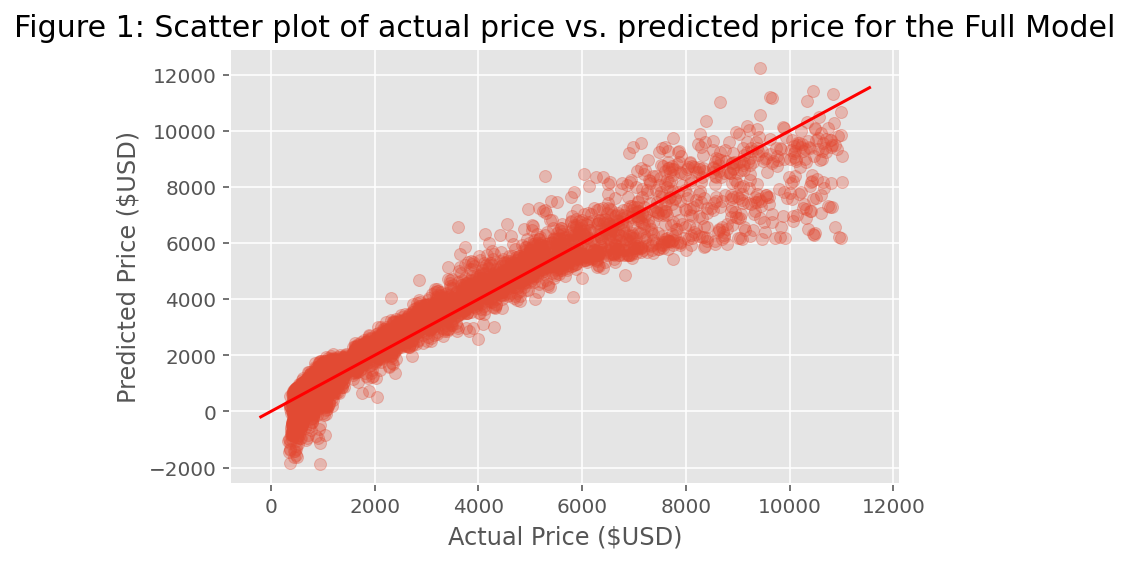

In [9]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price ($USD)');
plt.ylabel('Predicted Price ($USD)');
plt.title('Figure 1: Scatter plot of actual price vs. predicted price for the Full Model', fontsize=15);
plt.show();

From Figure 1, we can observe that the model is linear and starts congested being fanning out a little at around the $8000 range, with most of the actual prices falling below the predicted prices.

#### Full Model Diagnostics Checks

When modelling any sort of regression problem, we assume four things:
1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals



As seen in the ordinary least square table with a R-square value of above 0.90 it is save to assume that it satisfies the assumptions of the linearity relationships between the target variable, price and the many independent variables.

In this section we will check to see if any of these assumptions are violated.This is first done by obtaining a scatter plot of residuals as a function of predicted price.

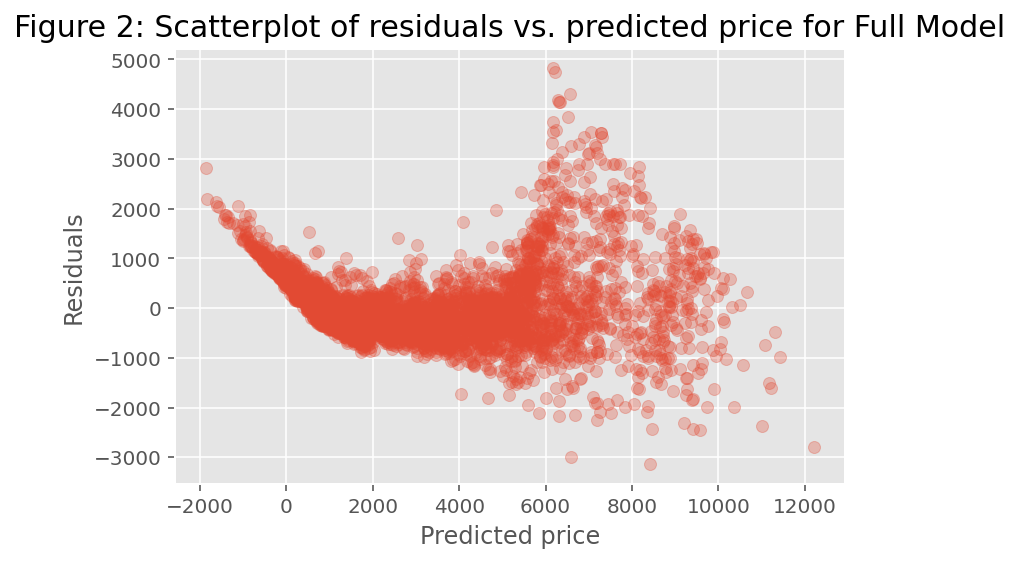

In [10]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted price');
plt.ylabel('Residuals')
plt.title('Figure 2: Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

From Figure 2, we can see that the prices goes into the negative range which is an error. We can also observe that the from the predicted price of 0 to 2000 the pattern is highly concentrated. However, above the predicted price of $4000 the pattern starts to fan out randomly. This suggest that the assumption of constant variability of errors is not really satisfied.

Now plotting actual price against residual

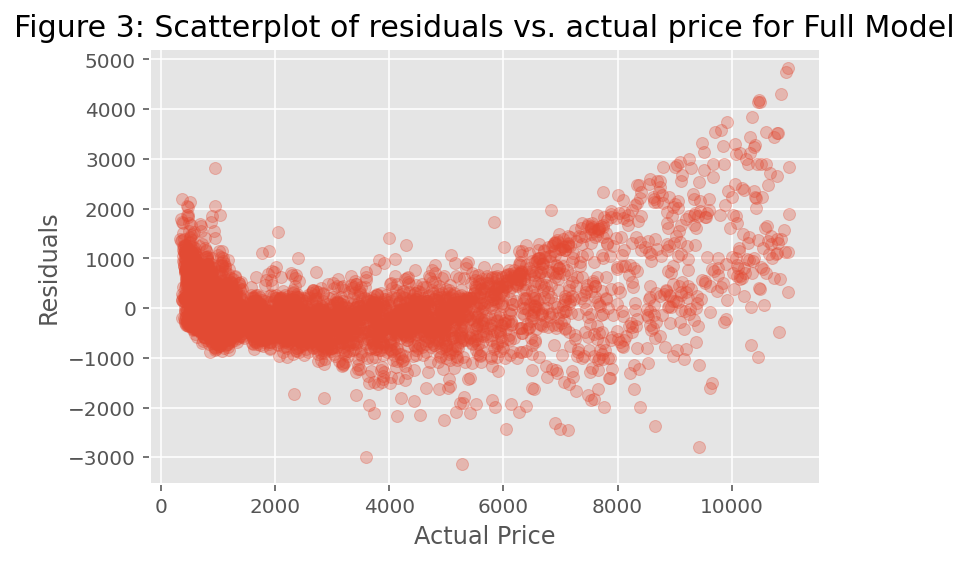

In [11]:

plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 3: Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

From the model we can see that it has a similar pattern to figure 2. We notice that the model for actual prices between 0 to 2000 dollars, it predicts much higher prices, this same pattern can be seen in prices higher than $8000. However for prices between 2000 to 6000 dollars the prediction of prices are somewhat even for lower and higher prices.

We will now plot out the histograms of actual prices against predicted prices

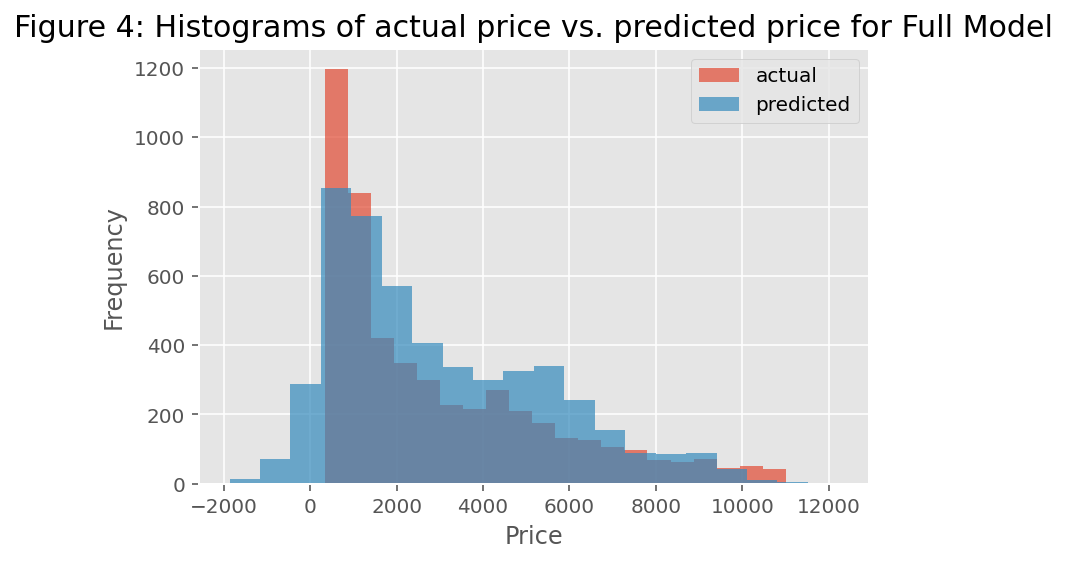

In [12]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 4: Histograms of actual price vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

From the figure we observe that both histograms are right skewed, with  most of the predicted prices overestimating the actual price. However at the mode, the actual price is actually higher than the predicted price. This is the same at the tail end of the data, that is prices higher than $10000.

Next, we will be looking at the plot of the residual values on a histogram to see if it satisfies assumption of the normality of residual distribution when dealing with regression.

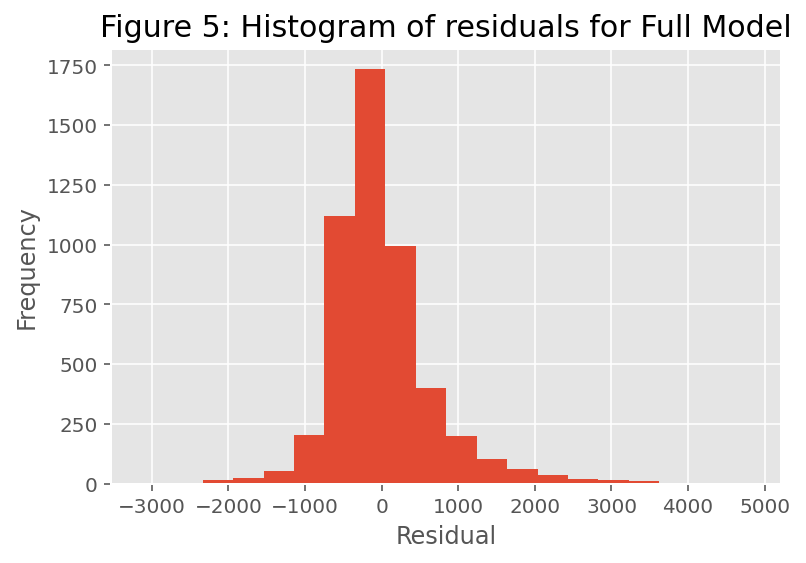

In [13]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 5: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From figure 5, the plot of residuals look somewhat normal with the most of the residuals falling around 0. Hence it is safe to assume that the assumption of the normality of the residual distribution is not violated.

####  Backward Feature Selection

We will now perform backward feature selection in order to remove features that are deem insignificant when it comes to predicting the prices of diamonds.

In [14]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = full_model_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "z_width" with p-value 0.07456

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2966.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:33:45   Log-Likelihood:                -39743.
No. Observations:                5000   AIC:                         7.953e+04
Df Residuals:                    4977   BIC:                         7.968e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------

We can depict that only one variable was remove, 'z width' as it have a p value of 0.075. After that was remove, no other variable was over 0.05 and hence the program was stopped. What we obtain was a new R-squared and adjusted R-squared value, 0.9291 and 0.9288, respectively.

Similar to what we did for the full model we will, construct new data frame for actual price against predicted price as well as the residuals of these differences.

In [15]:
residuals_reduced = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,1974,2065.929813,-91.929813
1,7702,7831.054048,-129.054048
2,992,773.601973,218.398027
3,1449,1699.206426,-250.206426
4,6922,7318.392090,-396.392090
5,9384,9140.769342,243.230658
6,1607,1871.390464,-264.390464
7,536,738.783912,-202.783912
8,1292,1349.563640,-57.563640
9,5191,6221.733500,-1030.733500


Next we plot this new data frame on a scatter plot.


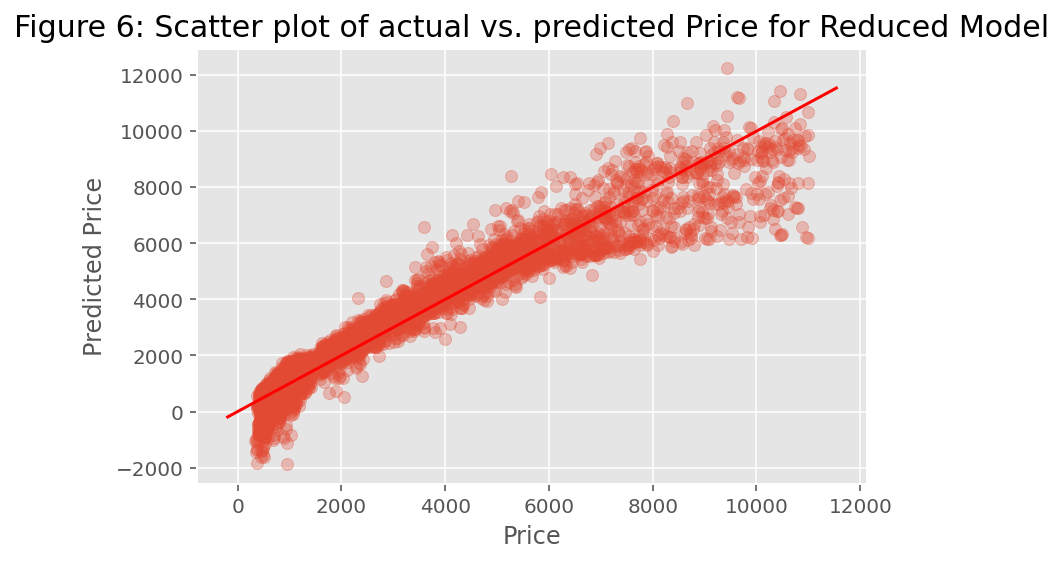

In [16]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 6: Scatter plot of actual vs. predicted Price for Reduced Model', fontsize=15);
plt.show();

From figure 6 we can see that, the model is similar if not identical to figure 1 from above. This suggest that the Adjusted R-squared is still above 0.90, meaning that the reduce model still explains 90% of the variance, but with one less variable: z width. Since the pattern is almost identical to figure 1, we can assume it also has the same issues as figure 1 as well, that is between 0 to 2000 dollars, the predicted prices are underestimated.

#### Reducing Model Diagnostic Checks

We first plot a scatter plot of the residuals


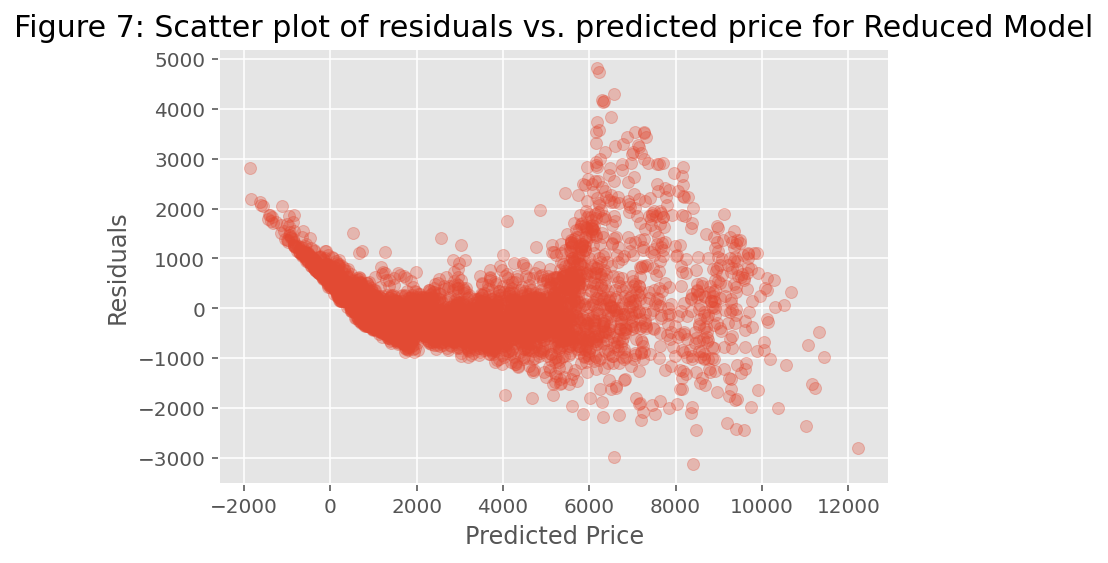

In [17]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 7: Scatter plot of residuals vs. predicted price for Reduced Model', fontsize=15)
plt.show();

Figure 7 looks similar to figure 2 suggesting that the residuals depict the same pattern.

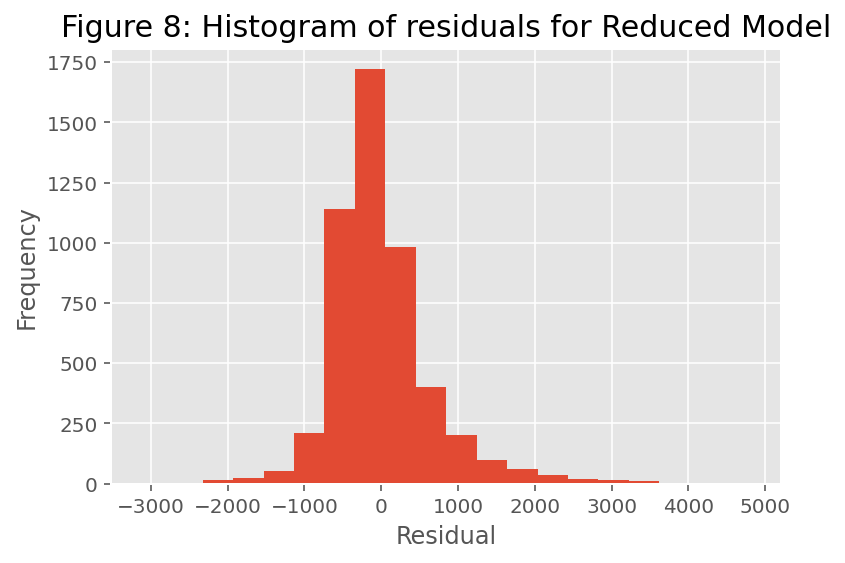

In [19]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 8: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From figure 8, we can see that the residuals are normally distributed around 0.

## Critique & Limitations <a id='cl'></a>

This report has many strengths and weaknesses which have all been recorded and accounted for when fitting our regression models. These are artifacts of both the diamond dataset upon which the project was conducted and the regression models fitted to the dataset.

#### Number of Significant Attributes

As can be seen from the Backwards Feature Selection section of the report under [Model Fitting](#fitting), only one attribute of the dataset was deemed irrelevant and therefor removed, leaving 23 attributes included for regression model fitting (9 when excluding the encoded attributes). This high number of relevant attributes in the dataset increases the difficulty of accurately fitting a regression model and therefor means the model that has been fit is less likely to be completely accurate across all attributes. The high adjusted R-squared value of 0.929 displays that this limitation is a product of the dataset and not the regression method used as backwards feature selection was performed prior to fitting the final linear regression model. 

#### Assumption of Constant Variability

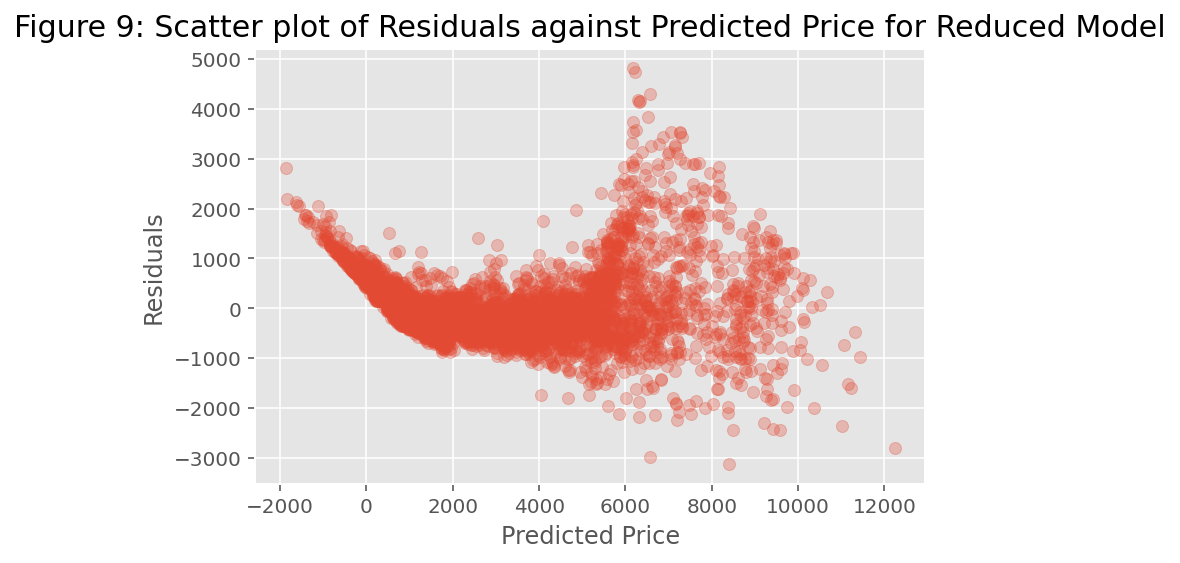

In [20]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 9: Scatter plot of Residuals against Predicted Price for Reduced Model', fontsize=15)
plt.show();

During both the full and reduced model diagnostic checks, it became clear that the regression model fitting does not satisfy the assumption of constant variability of residuals. Figure 9 depicts a non-constant variability in the values of the residuals, particularly above the \\$6000 price point of diamonds. This high variability in the higher price range means that the regression model fitted will be far less accurate at modeling diamond prices for expensive diamonds than it will be for modeling diamonds around the \\$0 - \\$4000 range. The residuals are normally distributed around 0 however, thus the assumption of nearly normal residuals is satisfied.

#### Under-predicting Low Priced Diamonds

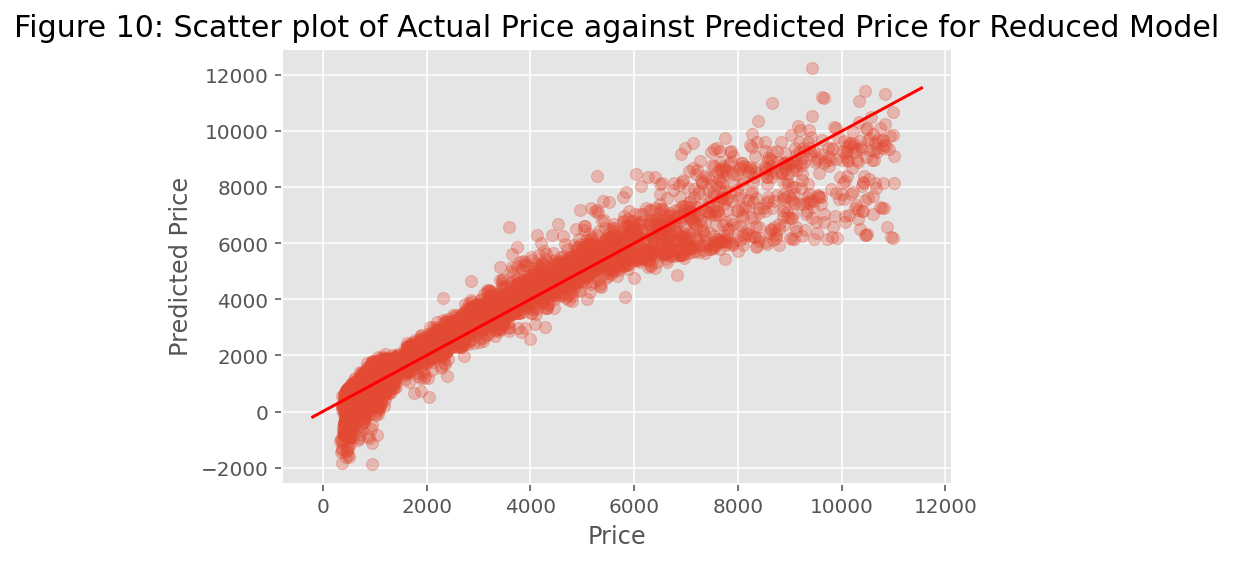

In [21]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 10: Scatter plot of Actual Price against Predicted Price for Reduced Model', fontsize=15);
plt.show();

During diagnostics of the reduced regression model we fitted we observed the model frequently under-predicting the prices of diamonds in the \\$0 - \\$2000 range. Figure 10 displays that the reduced model we have fitted commonly values diamonds under \\$2000 as being worth below \\$0, which is an error due to the fact that all diamonds must have a price of greater than \\$0. From this factor as well as the observed fanning out of the predicted price after the \\$8000 mark, it is clear that the model we have fitted is most accurate in the \\$2000 - \\$7000 range. 

#### Subjective Pricing of Diamonds

Another critique of the final model regards the diamond dataset itself. As previously stated in Phase 1 of this project, the value of a diamond can vary greatly based on a number of factors that are not represented in the dataset used in this report, such as the shape of the diamond. This factor means that accurately modeling the price of a diamond from the regression model we have fitted cannot be entirely accurate due to the highly subjective nature of diamond pricing. This factor also partially explains the drastic increase in residual variance at the \\$6000 price point, as diamonds that are already expensive will see a much higher price increase from the presence of a niche trait not recorded in our dataset, such as shape. While our regression model is able to use the attributes in the dataset to model diamond prices, it is limited by the inability to model the 'human aspect' of valuing a diamond.

## Summary & Conclusions <a id='sc'></a>

### Project Summary<a id ='ps'></a>

This project aimed to employ multiple statistical modeling techniques in order to model and predict the price of diamonds. A dataset containing the price and details of 5000 individual diamonds (randomly sampled from over 50,000 entries) was used to create an accurate and comprehensive report. 
<br>
<br>
<br>
In Phase 1, we began by defining the dataset being used and explaining the significance of the data types within it. The column titles were then altered to be more understandable and computation friendly. Doing this we also made that each column represented the correct data type and no entries had invalid or null values.

Moving to data integrity checking, we then systematically calculate outliers for each column of the data and drop all rows found to have outliers. This is repeated seven times for each column of the dataset. In total 7410 rows were dropped from the dataset, leaving 46,530 rows to be sampled randomly into our final dataset of 5000 rows to be modeled. 

Exploring and visualizing the data was completed next through the use of univariate, bivariate and multivariate graphs (three of each). Univariate graphs included graphing the quantity of diamonds against their cut type and clarity classification, as well as a box plot of the carat of diamond. The bivariate graphs involved projecting the price of the diamonds against their clarity level, carat and cut type. Finally, the multivariate graphs included a comparison of diamond price against each of clarity and colour, clarity and cut type and table size and cut type. 

Phase 1 of the report showed that while correlations were observed between the price of diamonds and characteristics like cut type and clarity, high variances were commonplace due to the intricate methodology used to value diamonds.
<br>
<br>
<br>
Phase 2 focused on creating multiple linear regression models of the cleaned dataset obtained from Phase 1, as well as validating and diagnosing the validity of the proposed models. Initially a regression formula was created from the columns of the cleaned data set. This was then modified after one hot encoding was performed on the dataset, leaving us with a cleaned and encoded dataset ready for use. 

Using the final dataset, an ordinary least squares regression model was fit. This model has an R-squared value of 0.929 which is very high and reassuring for the validity of the model. The model also shows quite low P values for every variable other than ‘z-width’ which will later be removed. The residuals of the model were then graphed from a new dataframe, showing a linear and largely congested relation between actual price and predicted price.

Diagnostic checks are then completed on the full model to ensure linearity between variables, relatively constant variance, normality of residual distribution and statistical independence of the residuals. Graphs were created to test for each of these assumptions and ensure that the shortcomings of the model were accounted for in the conclusion.

After diagnosing the model to ensure its validity, backwards feature selection is then performed in order to remove any variables that are deemed too insignificant (those with a p-value greater than 0.05). The actual price vs predicted price of the reduced model is then graphed and analysed to determine the effects of removing the insignificant variable. Finally, the residuals of the reduced model are plotted and analysed, showing a similar relation to predicted price as before the reduction occurred and having a frequency normally distributed around 0.


### Summary of Findings<a id ='sf'></a>

This report was successful in creating multiple linear regression models for the diamonds dataset and analyzing the best fitted model we created in order to predict diamond prices and determine which factors are important in valuing a diamond.
<br>
<br>
<br>
From our reduced regression model, we identified three factors as having the greatest effect on the price of a diamond. These factors include carat, depth percentage and x-width, all showing a P value of 0.00. The inclusion of carat in this set of three factors is expected based on the results from our Phase 1 report, where carat and price were frequently identified as being strongly proportional to each other. Of these three factors, high carat and depth percentage were predicted to increase the price of a diamond, while x-width was predicted to have a negative effect. 

We also identified the three attributes that were predicted to have the greatest increase on the price of a given diamond. Two of these attributes are having a cut type of 'Ideal' and an 'IF' clarity rating. These two attributes are the highest grade in each of their scales, with 'Ideal' being the best cut type present in the dataset and 'IF' clarity meaning 'Internally Flawless', also the best clarity rating in the dataset. For these reasons it is expected that these two attributes would have very positive effects on the price of a given diamond. The last attribute found to increase the price of a diamond the most was carat. This is understandable due to the carat of a diamond being one of the most important - and most advertised - features of a diamond. With a regression coefficient of 1.071e+04 it is clear in our model that carat is the most valuable attribute of a given diamond.

In addition to factors increasing the value of diamonds, we also found factors that decreased their value. In particular, the colour of a diamond as well as the x-width were identified as the factors with the greatest potential to devalue a diamond. The single biggest attribute decreasing diamond value was a colour of 'J', followed by high x-width and a colour of 'I'. The presence of colours 'J' and 'I' as factors decreasing diamond value is to be expected as within our dataset as they are the colour types that show the most tint (they are the least colourless), making them the least desirable, especially in larger diamonds of higher carat.

Another key factor identified in this report is the very high variance in diamond prices for a given set of features. Further, a combination of multiple desirable features (such as high carat and 'IF' clarity) that would typically result in a high valued diamond can be undermined by a single undesirable feature (such as a colour of 'J'), resulting in vastly differing prices between diamonds of similar features. The linear regression model we have fitted to our dataset is able to account for much of this variance, having an R-squared value of 0.929, however it is not able to take into account the element of human preference and perception of value.
<br>
<br>
<br>
From our diagnostic testing on our reduced regression model, we determined that - while imperfect - our model was most accurate for diamonds priced between \\$2000 and \\$7000. This is due to the fact that diamonds priced under \\$2000 were often under-valued by the model, as well as the stark increase in residual variance seen after the \\$7000 price point.

### Conclusions<a id ='con'></a>

Your detailed conclusions as they relate to your goals and objectives.